# Q8 Exercises Week 9 (Classification)

### a) Linear classification, kernels, and classification boundaries

`01-decision`
- Linear classification
    - Splits the data using linear decision boundary (line)
        - draw example with 2 classes and linear decision boundary
    - General formula for linear classifier:
    $$f(x) = \sigma(w^\top x)$$
    - This exercise the activation function is sign function
    $$f(x) = \text{sign}(\mathbf{w}^\top\mathbf{x})$$
    - The decision boundary is the line given by $f(x) = 0$
        - Since we have 2D affine model 
            $$0 = \begin{bmatrix}
                w_1\\
                w_2\\
                w_0\\
                \end{bmatrix}·
                \begin{bmatrix}
                x_1 & x_2 & 1\\
                \end{bmatrix} = w_1x_1+w_2x_2+w_0=0\\
                x_2 = -\frac{w_0}{w_2} - \frac{w_1}{w_2} x_1
                $$
    - From data visualization it looks like the data can be split in two using a line
- Linear classification
    - We can find the decision boundary manually and get a good accuracy (0.938)
    - Task 4 - If we want to learn decision boundary using LLS 
        - Setup data and labels and solve for model parameters
        - Accuracy is worse than the one found manually (0.887)
            - LLS takes all datapoints into account
            - I only considered the points close to the decision boundary
- If data was not seperable by a line (e.g. circularly distributed)
    - Use kernels to transform to a higher dimensional space
    - Seperate data with a line in higher dimensional space
    - In original dimensions the decision boundary will not look linear
    - Example of 1D data that cannot be linearly seperated
        - mapped to 2D (x^2)
    

### b) Logistic regression and classification boundaries

`02-logistic_regression`

- Logistic regression
    - Classification with sigmoid as activation function
    - Logistic regression predicts the probability that a given input belongs to a particular class
        - See visualization
    - Linear function wrapped in sigmoid:
        $$z = \mathbf{w}^\top\mathbf{x} = \sum_i w_i*x_i +w_0$$
        $$\sigma(z)=\frac{1}{1+\text{e}^{(-z)}}$$
    - Decision boundary is $\sigma(z)=0.5$, which means $z=0$
        $$z = \mathbf{w}^\top\mathbf{x} = \sum_i w_i*x_i +w_0=0$$
    - Task 2 (predictions)
        - If  $\sigma(z)>0.5$ then it is class 2 otherwise it is class 1. (see plot)
    - Probability
        - $\sigma(z)$ give us the probability of the element being in a certain class
        - if $\sigma(z)=0.7$ then we are 70% confident that z is class 2
        - Useful if we want to know how confident the model is about its predictions (docter predicting cancer)
        
### c) Linear and non-linear decision boundaries including SVM (include week 10)

`01-decision`

- Linear classification
    - Splits the data using linear decision boundary (line)
        - draw example with 2 classes and linear decision boundary
    - General formula for linear classifier:
    $$f(x) = \sigma(w^\top x)$$
    - This exercise the activation function is sign function
    $$f(x) = \text{sign}(\mathbf{w}^\top\mathbf{x})$$
    - The decision boundary is the line given by $f(x) = 0$
        - Since we have 2D affine model 
        $$0 = \begin{bmatrix}
            w_1\\
            w_2\\
            w_0\\
            \end{bmatrix}·
            \begin{bmatrix}
            x_1 & x_2 & 1\\
            \end{bmatrix} = w_1x_1+w_2x_2+w_0=0\\
            x_2 = -\frac{w_0}{w_2} - \frac{w_1}{w_2} x_1
            $$
    - From data visualization it looks like the data can be split in two using a line
- If data was not seperable by a line (e.g. circularly distributed)
    - Use kernels to transform to a higher dimensional space
        - Example of 1D data that cannot be linearly seperated
            - mapped to 2D (x^2)
        - Use Support Vector machines (SVMs) to seperate data with a line in higher dimensional space 
            - Uses kernel matrix which contains the pairwise similarities between all data points in the dataset, as computed by the kernel function
            - The kernel matrix is used by SVMs to find the decision boundary in the higher dimensional space
            - This decision boundary is used to classify new points
            - This decision boundary maximize the margin between the positive and negative training examples
    - Use non-linear decision boundaries (`w10/01-nonlineardecision`)
        - circular decision boundary
            - task 2 predictions from circular decision boundary
        - polar coordinates y=radius and x=angle 
            - making it linearly seperable


# Classification and decision boundaries
This exercise is about linear classification (actually affine) and the visualization of decision boundaries. Noteably, the parameters of the decision boundary will initially be adjusted manually (or randomly) then learned using least squares.
<article class="message is-warning">
  <div class="message-header">Note</div>
  <div class="message-body">
  
  The term linear classification is actually referring to an affine model as it includes a bias term.

  
  </div>
</article>


<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#linear">Task 1: Linear decision boundary</a>
            </li>
            <li>
            <a href="#predict22">Task 2: Prediction function - reflections</a>
            </li>
            <li>
            <a href="#predict">Task 3: Prediction function</a>
            </li>
            <li>
            <a href="#linear_optimization">Task 4: Learning the decision boundary</a>
            </li>
        </ul>
    </div>
</article>

## Linear Decision boundary
The prediction function $f_{w}(\mathbf{x})$ is used to predict which class a data point belongs to, by applying the $\text{sign}$ function to the result of the linear combination of input features and weights. The classification is based on whether the output of $f_{w}(\mathbf{x})$ is positive or negative. 
### Generating data points
In the following section you will be experimenting with a linear classifier: 

$$ f_{w}(\mathbf{x}) =  \mathbf{y} = \text{sign}({w_0} + \mathbf{w}^\top\mathbf{x})$$
where $\mathbf{w}$ are the model parameters (including a bias term) and $\mathbf{x}$ are the coordinates of the input. 
The $\text{sign}$ function is given by:

$$
\text{sign}(z) =
\begin{cases} 
-1 & \text{if } z ≤ 0, \\
1  & \text{if } z > 0.
\end{cases}
$$
Alternatively, using homogeneous representation the classifier is expressed as (with appropriate updates to $\mathbf{w}$ and $\mathbf{x}$):

$$\mathbf{y} = \text{sign}(\mathbf{w}^\top\mathbf{x})$$
### The Decision Boundary
In binary classification the decision boundary separates the positive and negative classes and is defined by:

$$
f_w(\mathbf{x}) = 0
$$
Points on one side (positive) of the boundary will be classified as the positive class (1), while points on the other side (negative) will be classified as the negative class (-1).
For the affine model, the decision boundary is the line when: 

$$
\mathbf{w}^\top \mathbf{x} + w_0 = 0
$$
For a two-dimensional affine model (with features $x_1$ and $x_2$), the decision boundary is given by:

$$
w_1 x_1 + w_2 x_2 + w_0 = 0
$$
For display purposes, the decision boundary can be expressed in terms of $x_1$ and $x_2$ by isolating $x_2$ on one side:

$$
x_2 = -\frac{w_0}{w_2} - \frac{w_1}{w_2} x_1
$$
The cell below imports libraries and generates random data to be used for classification. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

np.random.seed(42)  ## generate the same sequence of random points
# Generate 2 clusters of data, by drawing from a normal distribution.
S = np.eye(2)  ## covariance matrix, set to indenty matrix i.e. x,y independent.
p_pos = np.random.multivariate_normal([1, 1], S, 40)
p_neg = np.random.multivariate_normal([-1, -1], S, 40)
## 40 points (x,y) coordinates
p_pos.shape

(40, 2)

The data of the positive and negative classes are stored in the variables `p_pos`
 and `p_neg`
, respectively. The next cell visualizes the two classes. 


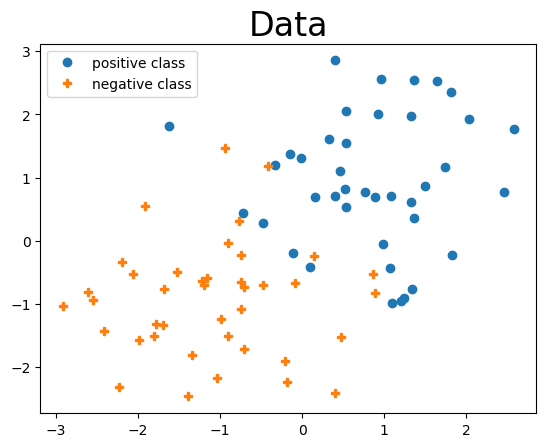

In [2]:
fig, ax = plt.subplots()
ax.plot(p_pos[:, 0], p_pos[:, 1], "o", label='positive class')
ax.plot(p_neg[:, 0], p_neg[:, 1], "P", label='negative class')
plt.title("Data", fontsize=24)
plt.legend()

### Setting the model parameters manually
In the following task you will manually change the model parameters of a linear decision boundary and visualize the results.
<article class="message task"><a class="anchor" id="linear"></a>
    <div class="message-header">
        <span>Task 1: Linear decision boundary</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Implement the function `linear_boundary`
, which, given an $x_1$-coordinate and the model parameters $w$ = [$w_0$, $w_1$, $w_2$], returns the corresponding $x_2$-value according to:


$$
x_2 = -\frac{w_0}{w_2} - \frac{w_1}{w_2} x_1
$$
2. The array `x_values`
 below provides the $x_1$-values (x-coordinates) over which the boundary will be plotted. The model parameters $w_0$, $w_1$, and $w_2$ define the position and slope of the boundary. Use the `linear_boundary`
 function to generate points for the decision boundary by implementing the following steps:

- Create an array `w`
 with the manually selected model parameters. 
- Pass the `x_values`
 and `w`
 to the `linear_boundary`
 function to calculate the corresponding $x_2$-values.

3. Run the cell below to visualize the decision boundary. Which choice of model parameters $w_0$, $w_1$, and $w_2$ seems to visually best separate the two classes? Try 10 different sets of model parameters and identify which values provide the largest fraction of correct predictions.



</div></article>



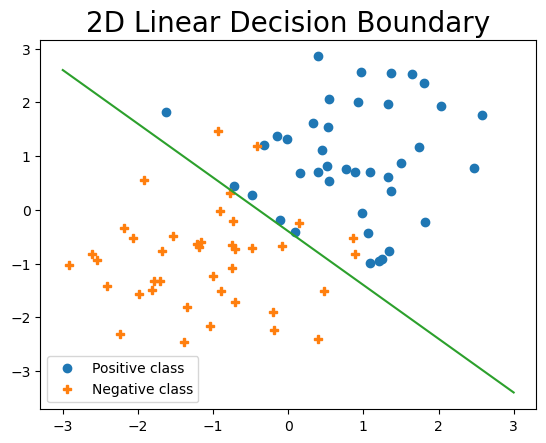

In [3]:
def linear_boundary(x, w):
    """
    :param x: x values of the line.
    :param w: List of model parameters [bias, slope] of the line.

    :return: the x2 values which correspond to the y-values of the boundary / line .
    """
    # Write solutions here
    return -(w[0]/w[2])-(w[1]/w[2])*x

# Defining x-values and weights
x_values = np.linspace(-3, 3, 100)
w = [0.4,1,1] # write your solution here

# Plotting the data points and decision boundary
fig, ax = plt.subplots()
ax.plot(p_pos[:, 0], p_pos[:, 1], "o", label='Positive class')
ax.plot(p_neg[:, 0], p_neg[:, 1], "P", label='Negative class')
ax.plot(x_values, linear_boundary(x_values, w))
plt.title("2D Linear Decision Boundary", fontsize=20)
plt.legend()
plt.show()

<article class="message task"><a class="anchor" id="predict22"></a>
    <div class="message-header">
        <span>Task 2: Prediction function - reflections</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Is a linear decision boundary a good model to separate the two groups of data? 
2. A correct prediction occurs when  $y_i \cdot f_w(\mathbf{x}_i)$  is positive, where  $y_i$  is the true label for the $i$-th data point and  $\mathbf{x}_i$  is the input vector for the $i$-th data point. Why is this the case?



</div></article>



In [4]:
# Write your reflections here
'''
    1. A linear decision boundary seems to be a good model to seperate the two groups as it seems to get most right.
    It seems hard to find a function that would be better in this case
    2. This is true because if yi is positive and fw(xi) is also positive then the result is postive. Similar if both
    are negative then the output will be positive. If one is positive and the other is negative (different prediction
    than the actual result) then the output is negative
'''

'\n    1. A linear decision boundary seems to be a good model to seperate the two groups as it seems to get most right.\n    It seems hard to find a function that would be better in this case\n    2. This is true because if yi is positive and fw(xi) is also positive then the result is postive. Similar if both\n    are negative then the output will be positive. If one is positive and the other is negative (different prediction\n    than the actual result) then the output is negative\n'

### Making and evaluating predictions
The performance of the model can be evaluated by calculating the _accuracy_, which is defined as (percentage): 
$$ \text{accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$
.
<article class="message task"><a class="anchor" id="predict"></a>
    <div class="message-header">
        <span>Task 3: Prediction function</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Implement the function `predict`
 that given the data and the model parameters `w`
 as input, predicts whether a data point belongs to the `neg`
 or `pos`
 class. Return 1 for points above the boundary (positive class) and -1 for points below the boundary (negative class). Manually select the model parameters to predict class labels for both the `p_neg`
 and `p_pos`
 variables by calculating the sign of the prediction function  $f_w(\mathbf{x})=z = w_0 + w_1 \cdot x_1 + w_2 \cdot x_2$  for each data point. 

2. Implement and execute the `accuracy`
 function that returns the accuracy of the classifier over the entire training set by comparing the predicted classes to the actual classes.


<article class="message is-warning">
  <div class="message-header">Tip</div>
  <div class="message-body">

  The denominator in the accuracy formula can be found by counting the number of times the prediction $f_w(\mathbf{x_i}) = y_i$, or the amount of times $ y_i \cdot f_w(\mathbf{x_i}) > 0 $,  where  $y_i$ are the labels.


  </div>
</article>


</div></article>



In [5]:
def predict(w, p):
    """
    Predict class based on decision boundary (logistic regression).
    :param w: Model parameters [w0, w1, w2].
    :param p: Data points to classify (Nx2 array).

    :return: Predicted class labels (-1 for neg, 1 for pos).
    """
    # Write solutions here
    return np.sign(w[0] + w[1]*p[:,0] + w[2]*p[:,1])


def accuracy(predictions,targets):
    """
    :param predictions (1xn array): of predicted classes for the n data points.
    :param targets (1xn array):  actual classes for the n data points.

    :return (float): fraction of correctly predicted points (num_correct/num_points).
    """
    # Write solutions here
    correct = 0
    for i in range(len(predictions)):
        if predictions[i]*targets[i] > 0:
            correct+=1

    return (correct/len(predictions))

pred_pos = predict(w, p_pos) # write your solution here
pred_neg = predict(w, p_neg) # write your solution here
# print(pred_pos)
acc_pos = accuracy(pred_pos, np.ones((len(p_pos), 1))) # write your solution here
acc_neg = accuracy(pred_neg, np.negative(np.ones((len(p_pos), 1)))) # write your solution here

print(f'Accuracy of decision line: {(acc_neg+acc_pos)/2:.3f}')

Accuracy of decision line: 0.938


<article class="message task"><a class="anchor" id="linear_optimization"></a>
    <div class="message-header">
        <span>Task 4: Learning the decision boundary</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Implement the `learn_affine_classifier`
 function which given arrays of positive and negative examples uses least squares to estimate the model parameters `w`
 to separate the two classes. In particular the function should:
    - Construct the $N \times 3$ design matrix containing the data points.
    - Construct the vector `labels`
 consisting of the labels  (1 for positive class, -1 for negative class).
    - Solve the linear set of equations.


2. Run the cell below to plot the decision boundary. 

3. Evaluate the accuracy of the learned decision boundary: 
    - Use the `predict`
 function to predict class labels for the data points. 
    - Use the `accuracy`
 function to evaluate the found model.
    - Compare the decision boundary and the accuracy measures to the one obtained in [Task 3](#predict). How do the values found manually compare to the one found automatically through least squares?





</div></article>



model parameters: 
[[0.05190787]
 [0.38637445]
 [0.32086606]]


/var/folders/q2/y4726bh527bcznrqcvx4tlp40000gn/T/ipykernel_10113/316810261.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.plot(x_values, linear_boundary(x_values, w_learned), label='Learned boundary: y = %.2f + %.2f x' % (-w_learned[0]/w_learned[2], -w_learned[1]/w_learned[2]), color='green')


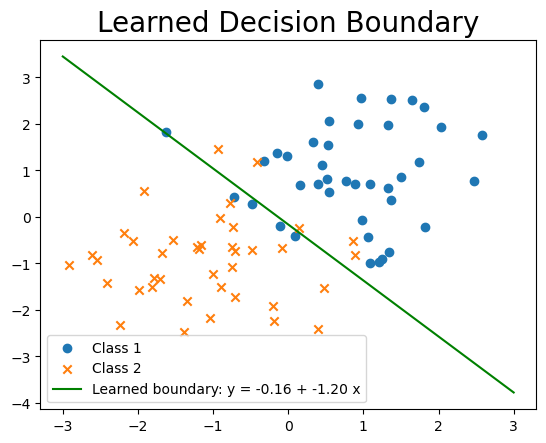

Accuracy of learned boundary: 0.887


'\n    The accuracy of the learned boundary is worse than the one found manually. This is because the learned boundary\n    is the best fit of line, meaning that minimizes the distance to the points but it has more points that are just\n    on at the wrong side of the line.\n    Least squares takes all the points into account, meaning that it finds the true center of the mass, whereas i manually\n    tried to minimize the number of points that was wrong, and only really considered the points close to the line.\n    This means that even though the manually found points are more accurate in this case, it might be biased in terms of\n    the dataset, so that it will perform worse on new data.\n'

In [14]:
# 1
def learn_affine_classifier(p_pos, p_neg):
    """
    Fit the decision boundary using least squares regression.

    :param p_pos: Data points of the positive class.
    :param p_neg: Data points of the negative class.

    :return: The learned parameters w (intercept and slope).
    """
    # Combine the positive and negative points into a single dataset
    data = np.concatenate((p_pos, p_neg), axis=0)

    # Create the labels: 1 for positive class, 0 for negative class
    labels = np.concatenate((np.ones((len(p_pos), 1)), np.negative(np.ones((len(p_pos), 1)))), axis=0)

    # Add a bias column (column of 1s) to the data
    X = np.concatenate((np.ones((len(data), 1)), data), axis=1)
    # Learn the model parameters
    w_least_squares = np.linalg.lstsq(X,labels)[0]
    # Return the model parameters
    return w_least_squares

# Find the decision boundary with least squares
w_learned = learn_affine_classifier(p_pos, p_neg)
print("model parameters: ")
print(w_learned)

# 2
# Define x-values for plotting the decision boundaries
x_values = np.linspace(-3, 3, 100)

# Plotting the learned decision boundary
fig, ax = plt.subplots()
ax.scatter(p_pos[:, 0], p_pos[:, 1], marker='o', label='Class 1')  # positive class
ax.scatter(p_neg[:, 0], p_neg[:, 1], marker='x', label='Class 2')  # negative class
ax.plot(x_values, linear_boundary(x_values, w_learned), label='Learned boundary: y = %.2f + %.2f x' % (-w_learned[0]/w_learned[2], -w_learned[1]/w_learned[2]), color='green')
plt.title("Learned Decision Boundary", fontsize=20)
plt.legend()
plt.show()

# 3
pred_pos = predict(w_learned, p_pos) # write your solution here
pred_neg = predict(w_learned, p_neg) # write your solution here

acc_pos = accuracy(pred_pos, np.ones((len(p_pos), 1))) # write your solution here
acc_neg = accuracy(pred_neg, np.negative(np.ones((len(p_pos), 1)))) # write your solution here

print(f'Accuracy of learned boundary: {(acc_neg + acc_pos) / 2:.3f}')

'''
    The accuracy of the learned boundary is worse than the one found manually. This is because the learned boundary
    is the best fit of line, meaning that minimizes the distance to the points but it has more points that are just
    on at the wrong side of the line.
    Least squares takes all the points into account, meaning that it finds the true center of the mass, whereas i manually
    tried to minimize the number of points that was wrong, and only really considered the points close to the line.
    This means that even though the manually found points are more accurate in this case, it might be biased in terms of
    the dataset, so that it will perform worse on new data.
'''